# Recommend Challenges to Students
### To - Do:
- Predict 10 challenge recommendations for each user to solve as their next challenge.

**Problem Statement**
At CodeAsylums, we love helping our users find interesting challenges so we're always improving our challenge recommendation system. In this challenge, you must predict a set of challenges that a CodeAsylums users is likely to solve. We'll provide you with a list of challenges along with information on where they are located on CodeAsylums platform. You'll also have a list of submissions made by a subset of users on these challenges. You must attempt to predict 10 challenge recommendations for each user to solve as their next challenge.

Files: 
- a)	challenges.csv: This dataset contains information about the challenges.
- b)	submissions.csv: This dataset contains information about the submissions made by users.

Submit your answer as submission.csv. First column in each row will be user_id and next 10 columns will be 10 recommendation challenge_id.


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
challenges = pd.read_csv('./data/challenge3/challenges.csv')
submissions = pd.read_csv('./data/challenge3/submissions.csv')

## Summarize the data

- Descriptive Statistics 
- Data Visualization

In [3]:
# Shape and head of challenges offered
print(challenges.shape)
challenges.head()

(2865, 7)


,challenge_id,contest_id,domain,subdomain,difficulty,solved_submission_count,total_submissions_count
0,18e0a2dad5e127d6,c8ff662c97d345d2,Artificial Intelligence,Bot Building,0.978261,319,655
1,0251520ace81bc57,c8ff662c97d345d2,Algorithms,Strings,0.894473,765,1267
2,425f241df843cd89,c8ff662c97d345d2,Algorithms,Strings,0.908853,1247,1864
3,970eca328814a522,c8ff662c97d345d2,Algorithms,Strings,0.902722,453,835
4,46592c29655cfc5e,c8ff662c97d345d2,Algorithms,Strings,0.900000,312,1363


In [4]:
# Shape and head of submission done
print(submissions.shape)
submissions.head()

(286064, 6)


,hacker_id,contest_id,challenge_id,language,solved,created_at
0,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:36:53 UTC
1,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:38:45 UTC
2,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:43:49 UTC
3,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:52:34 UTC
4,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:56:52 UTC


In [20]:
# Count and datatypes of columns in Challenges
challenges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2865 entries, 0 to 2864
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   challenge_id             2865 non-null   object 
 1   contest_id               2865 non-null   object 
 2   domain                   1289 non-null   object 
 3   subdomain                1289 non-null   object 
 4   difficulty               2865 non-null   float64
 5   solved_submission_count  2865 non-null   int64  
 6   total_submissions_count  2865 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 156.8+ KB


In [103]:
# In challenges dataset
print('Number of unique challenges: {}'.format(challenges.challenge_id.nunique()))
print('Number of unique contests: {}'.format(challenges.contest_id.nunique()))

Number of unique challenges: 2228
Number of unique contests: 256


In [21]:
# Count and datatypes of columns in Submissions
submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286064 entries, 0 to 286063
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   hacker_id     286064 non-null  object
 1   contest_id    286064 non-null  object
 2   challenge_id  286064 non-null  object
 3   language      286064 non-null  object
 4   solved        286064 non-null  int64 
 5   created_at    286064 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.1+ MB


We can see that there is no missing values in the submissions dataset, but missing values are present in challenges dataset.

In [102]:
# In submissions dataset
print('Number of unique hackers: {}'.format(submissions.hacker_id.nunique()))
print('Number of unique challenges: {}'.format(submissions.challenge_id.nunique()))
print('Number of unique contests: {}'.format(submissions.contest_id.nunique()))

Number of unique hackers: 10000
Number of unique challenges: 2156
Number of unique contests: 254


#### Visualize the Challenges dataset

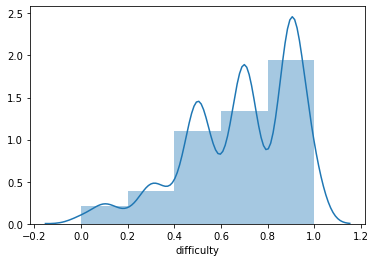

In [28]:
# Histogram of Difficulty Level of challenges
sns.distplot(challenges.difficulty, bins = 5)

We can categorize the difficulty level of challenges according to the difficulty 

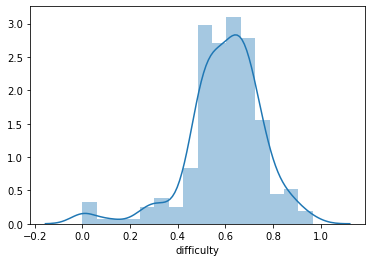

In [32]:
# Histogram of difficulty of contests
sns.distplot(challenges.groupby('contest_id')['difficulty'].mean())

Majority of the contests have challenges with difficulty between 0.5 and 0.8 

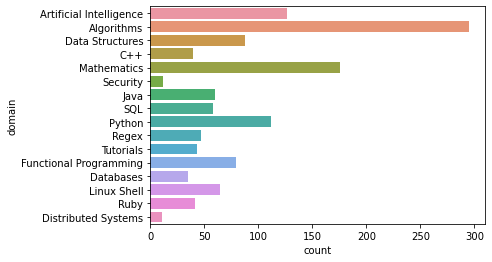

In [48]:
# Distribution of challenges
sns.countplot(y=challenges.domain)
plt.show()

#### Visualize the Submissions dataset

In [49]:
submissions.head()

,hacker_id,contest_id,challenge_id,language,solved,created_at
0,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:36:53 UTC
1,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:38:45 UTC
2,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:43:49 UTC
3,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:52:34 UTC
4,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:56:52 UTC


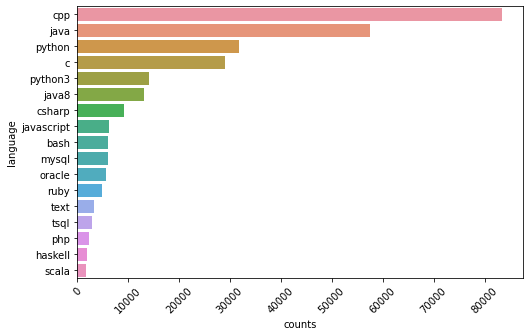

In [97]:
# Languages used by hackers
plt.figure(figsize=(8, 5))

# Filtering for most commonly used programming languages
most_used_lang = submissions.groupby('language')['language'].count()
most_used_lang = pd.DataFrame({'language': most_used_lang.index, 'counts': most_used_lang.values})
most_used_lang = most_used_lang.loc[most_used_lang.counts > (len(submissions) * 0.005)]
most_used_lang = most_used_lang.sort_values(by='counts', ascending=False)

# Plotting
sns.barplot(x='counts', y='language', data=most_used_lang)
plt.xticks(rotation = 45)
plt.show()

## Prepare Data
- Data Cleaning
- Data Transforms
- Feature Selection

In [85]:
# Converting the created at column to date time object
submissions.created_at = submissions.created_at.apply(lambda x : x[:10])
submissions.created_at = pd.to_datetime(submissions.created_at, format='%Y-%m-%d')

In [89]:
# Categorizing the difficulty level of challenges into 5 categories
challenges.difficulty = pd.cut(challenges.difficulty, [0, 0.2, 0.4, 0.6, 0.8, 1], labels = [1, 2, 3, 4, 5])
challenges.head()

,challenge_id,contest_id,domain,subdomain,difficulty,solved_submission_count,total_submissions_count
0,18e0a2dad5e127d6,c8ff662c97d345d2,Artificial Intelligence,Bot Building,5,319,655
1,0251520ace81bc57,c8ff662c97d345d2,Algorithms,Strings,5,765,1267
2,425f241df843cd89,c8ff662c97d345d2,Algorithms,Strings,5,1247,1864
3,970eca328814a522,c8ff662c97d345d2,Algorithms,Strings,5,453,835
4,46592c29655cfc5e,c8ff662c97d345d2,Algorithms,Strings,5,312,1363
